In [11]:
from skimage.io import imread
from matplotlib import pyplot as plt
from os.path import join
import numpy as np
from PIL.ImageOps import fit
from PIL import Image
from tqdm import tqdm

%matplotlib inline

inDirAtt ='../list_attr_celeba.txt'
inDirIm='../img_align_celeba'
IMSIZE=64

f = open(inDirAtt)
noSamples = int(f.readline())
print('There are %d samples' % noSamples)
labels = f.readline().split(' ')
print(labels, type(labels))
smileIdx = labels.index('Smiling')
print('Smile index:', smileIdx)
dataX = []
dataY = []
for i, line in enumerate(f):
    imName, labels = line.split(' ')[0], line.split(' ')[1:]
    label = np.loadtxt(labels)
    #print(imName, label)
    
    #print(i)
    im = imread(join(inDirIm, imName))
    im = Image.fromarray(im)
    im = fit(im, size=(IMSIZE,IMSIZE))
    label = label.astype('int')
    im = np.transpose(im, (2,0,1))
    dataX.append(im)
    dataY.append(label)

There are 202599 samples
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young', '\n'] <class 'list'>
Smile index: 31



52910it [01:14, 952.56it/s]

In [21]:
np.save('../InData/celebA/xTrain.npy', np.asarray(dataX))
np.save('../InData/celebA/yAllTrain.npy', np.asarray(dataY))

In [25]:
smileIdx

31

In [26]:
dataY[0][smileIdx]

1

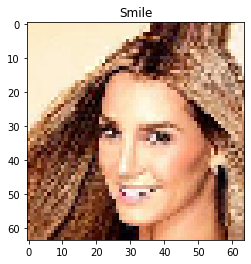

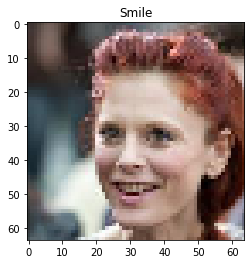

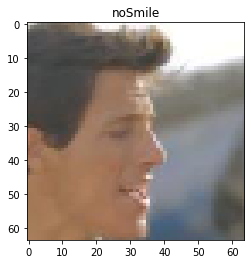

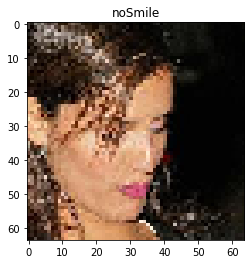

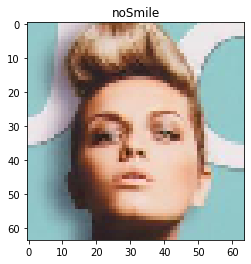

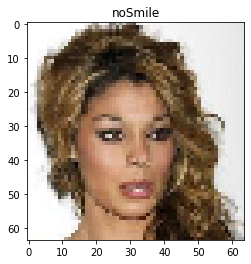

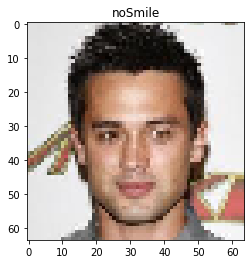

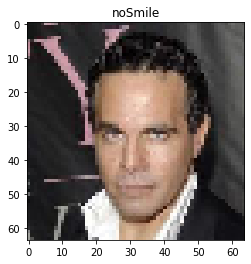

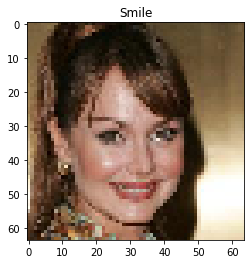

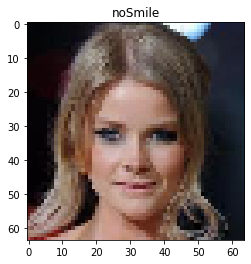

In [28]:
labels=['noSmile', '', 'Smile']
for i in range(10):
    plt.figure()
    plt.title(labels[dataY[i][smileIdx]+1])
    plt.imshow(dataX[i].transpose(1,2,0))
    dataY = np.asarray(dataY)
    dataX = np.asarray(dataX)